In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [3]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [4]:
# Separate the dependent column

y = df_train.pop('SalePrice')
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
df_train.shape, df_test.shape

((1460, 80), (1459, 80))

In [6]:
df = pd.concat([df_train, df_test], axis=0)

In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
df.shape

(2919, 79)

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


#### Separating Numerical columns & Categorical Columns

In [10]:
category_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [11]:
df_category = df[category_features].copy()
df_numerical = df[numerical_features].copy()

In [12]:
df_category.shape, df_numerical.shape

((2919, 43), (2919, 36))

***
## <font color='red'>Handling Missing Value</font>

<AxesSubplot:>

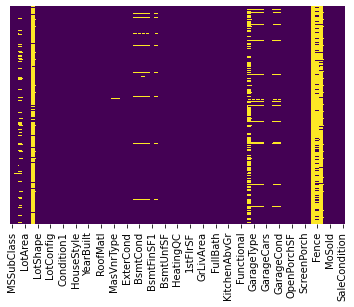

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
# Function to fill all the category NaN value

def fill_category_nan(dataframe, columns):
    for feature in columns:
        if dataframe[feature].isnull().sum() > 0:
            dataframe[feature] = dataframe[feature].fillna(feature + '_Missing')

In [15]:
def fill_numerical_nan(dataframe, columns):
    for variable in columns:
        if dataframe[variable].isnull().sum() > 0:
            random_sample = dataframe[variable].dropna().sample(dataframe[variable].isnull().sum(), random_state=0)

            # pandas need to have same index in order to merge the dataset
            random_sample.index= dataframe[dataframe[variable].isnull()].index

            # using loc we are replacing with random sample whenever it finds null
            dataframe.loc[df[variable].isnull(), variable] = random_sample

In [16]:
# Call function to fill NaN value
fill_category_nan(df_category, category_features)

# Call function to fill numerical NaN value
fill_numerical_nan(df_numerical, numerical_features)

<AxesSubplot:>

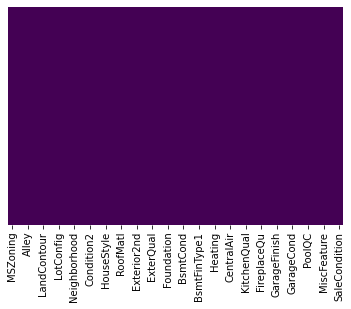

In [17]:
sns.heatmap(df_category.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

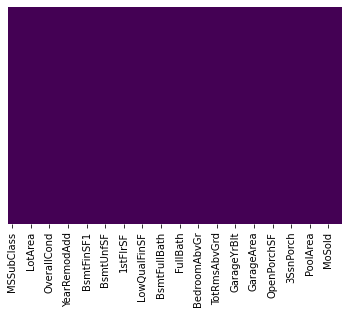

In [18]:
sns.heatmap(df_numerical.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008


***
## <font color='red'>Handling Outliers</font>

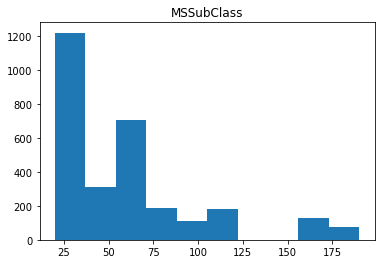

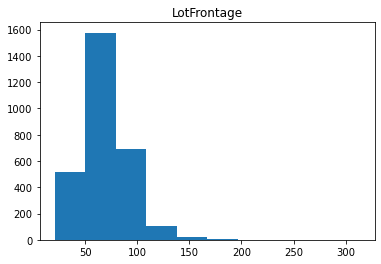

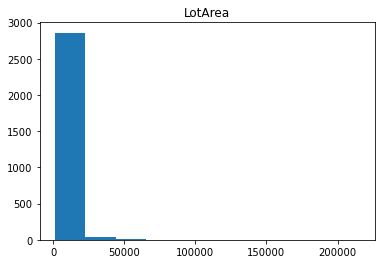

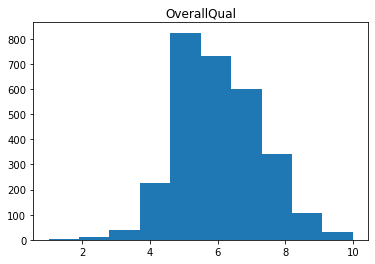

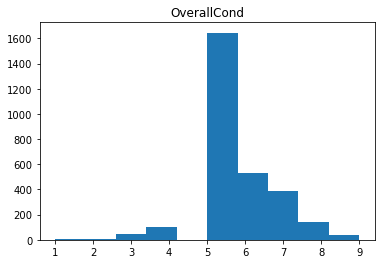

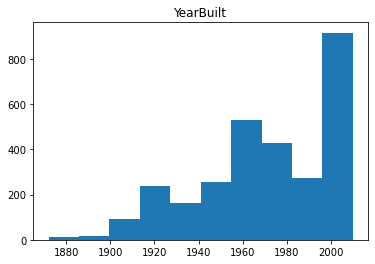

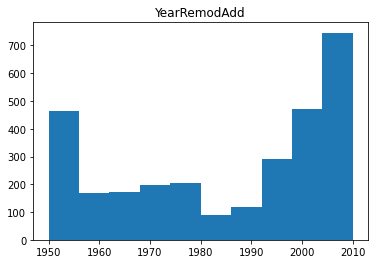

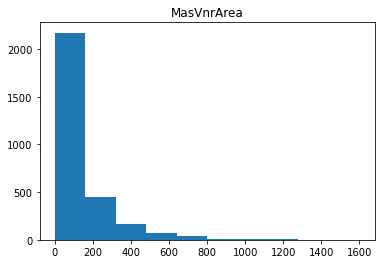

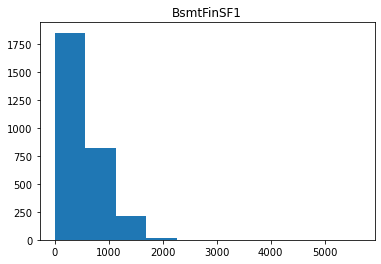

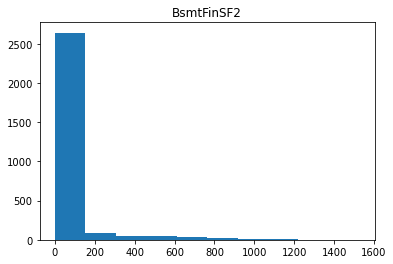

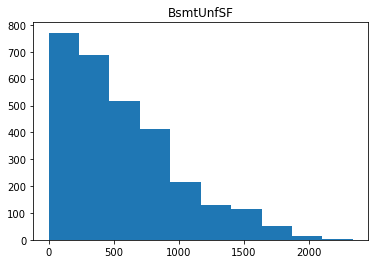

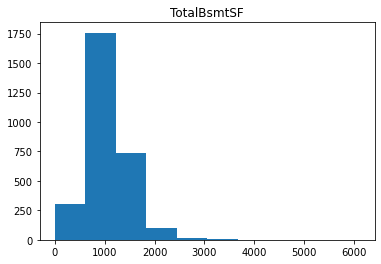

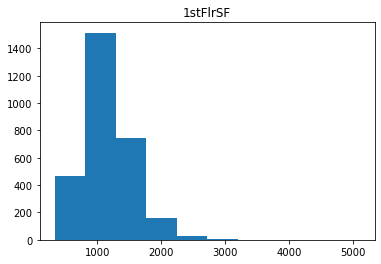

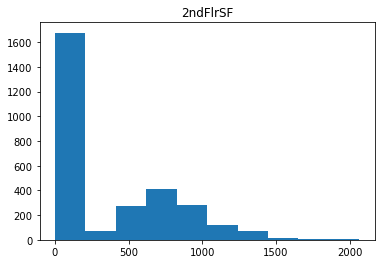

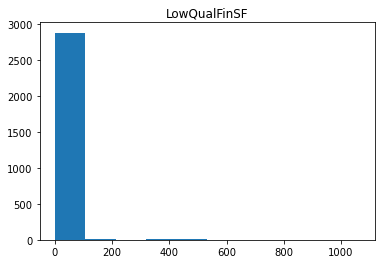

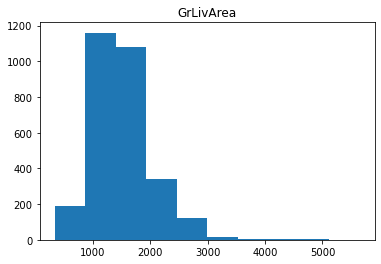

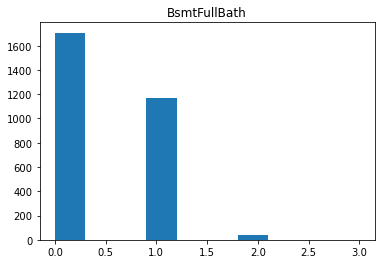

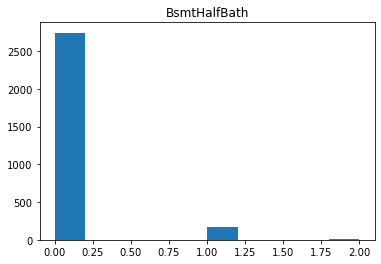

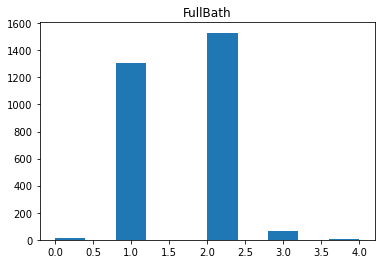

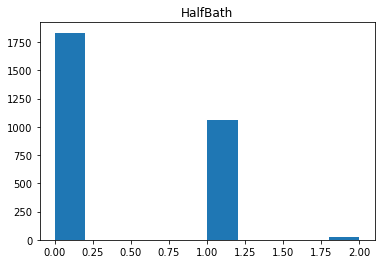

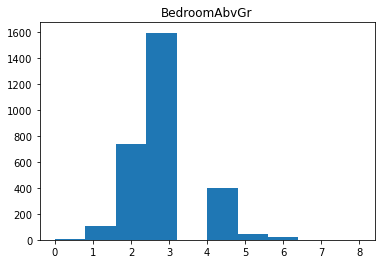

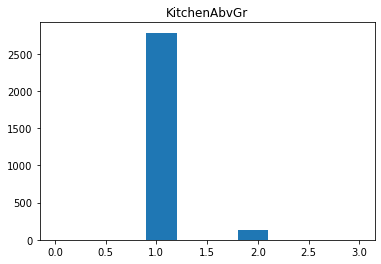

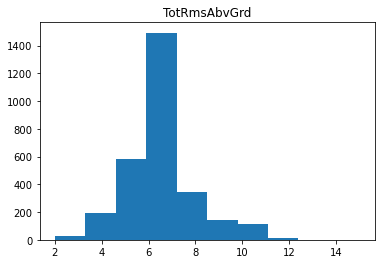

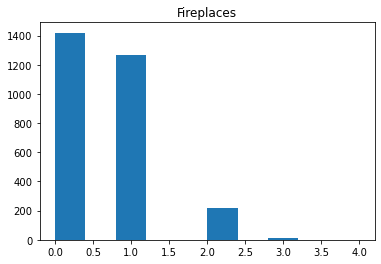

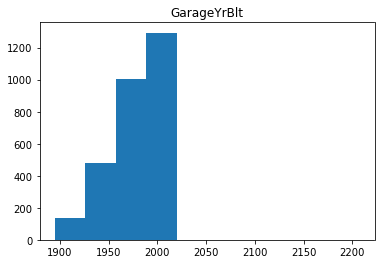

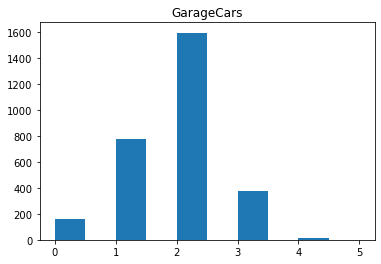

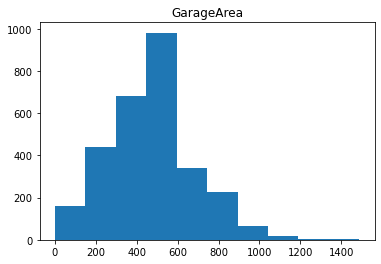

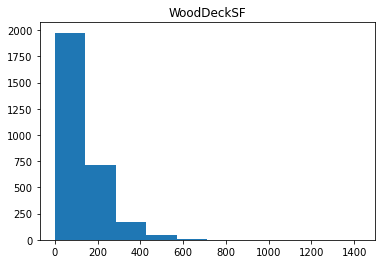

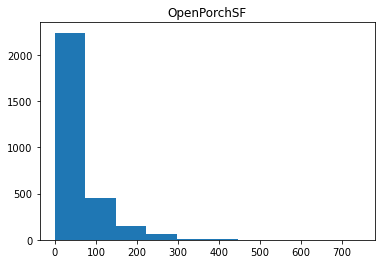

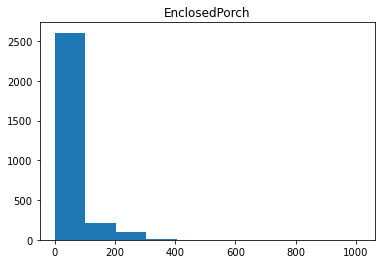

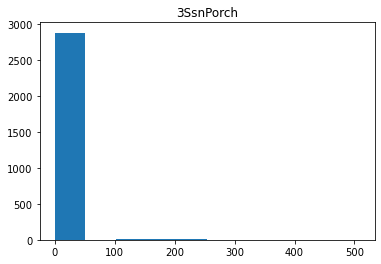

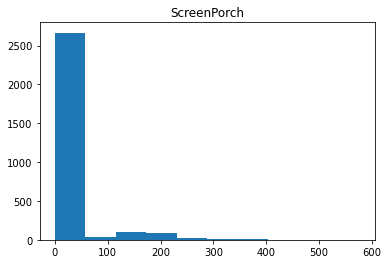

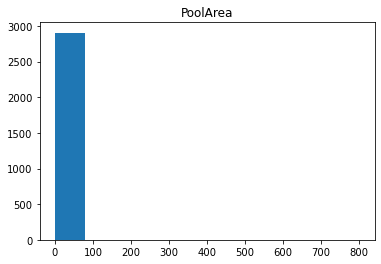

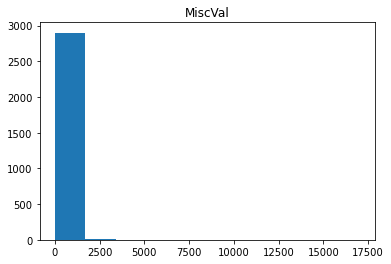

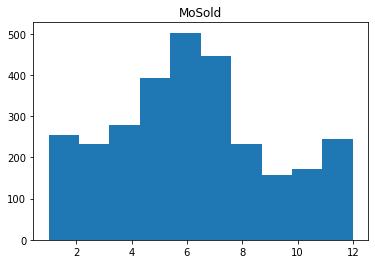

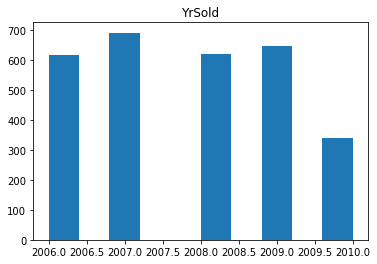

In [20]:
for item in df_numerical.columns:
    plt.hist(df_numerical[item])
    plt.title(item)
    plt.show()

In [21]:
def handle_outlier(dataframe, col):
    upper_bound = dataframe[col].mean() + 3* dataframe[col].std()
    lower_bound = dataframe[col].mean() - 3* dataframe[col].std()
    dataframe[col] = np.where(dataframe[col] > upper_bound, upper_bound, dataframe[col])
    dataframe[col] = np.where(dataframe[col] < lower_bound, lower_bound, dataframe[col])

In [22]:
for item in df_numerical.columns:
    handle_outlier(df_numerical, item)

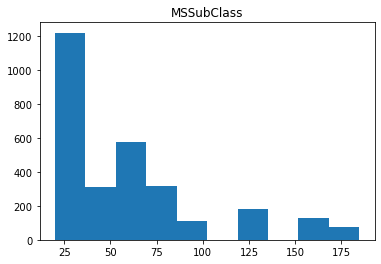

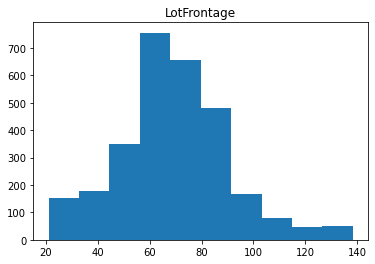

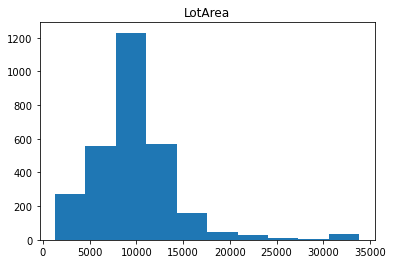

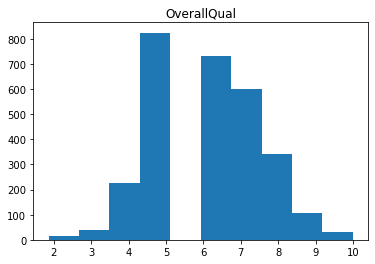

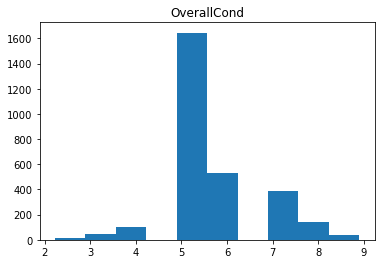

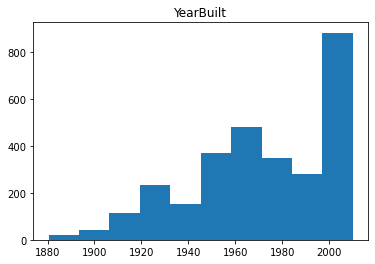

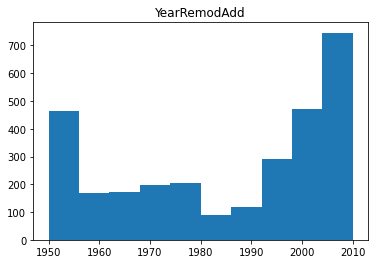

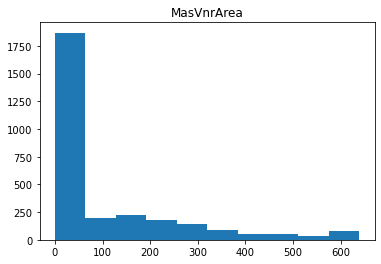

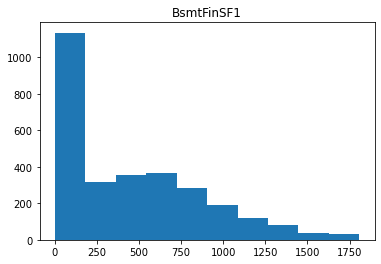

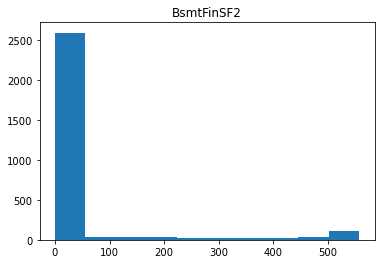

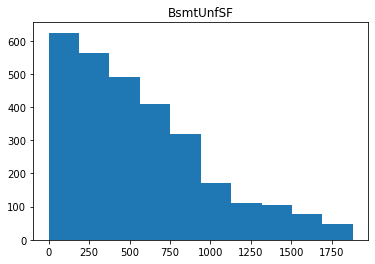

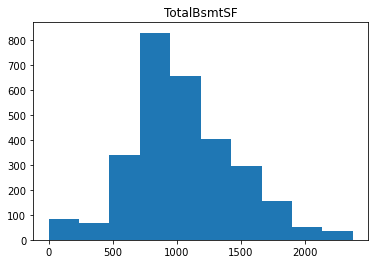

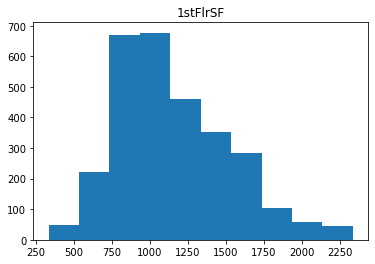

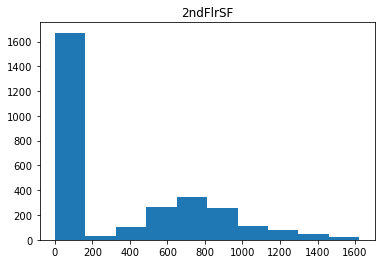

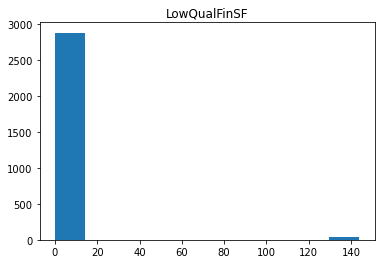

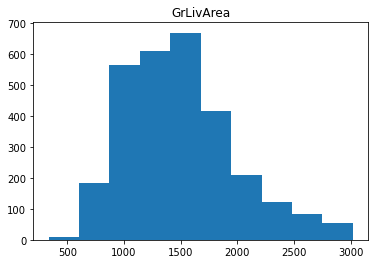

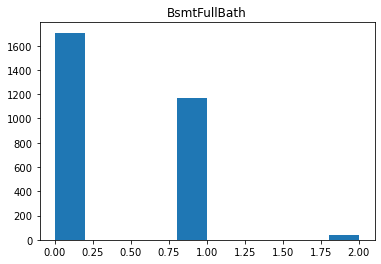

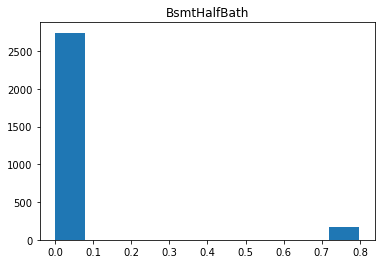

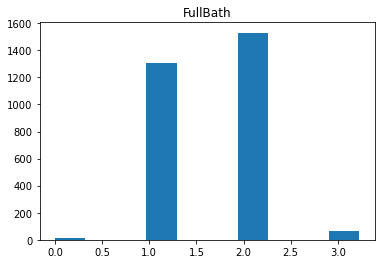

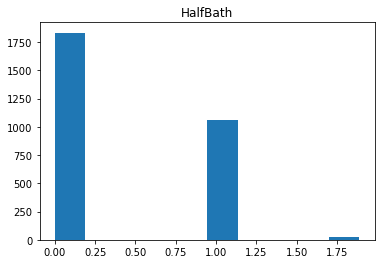

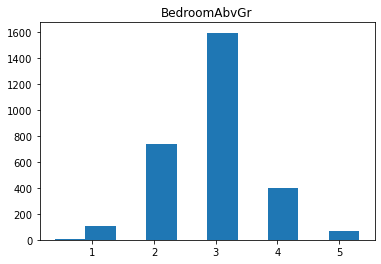

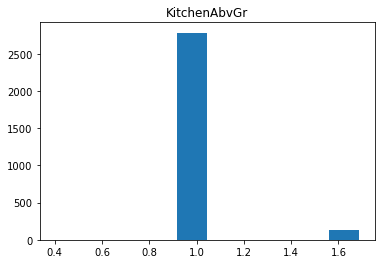

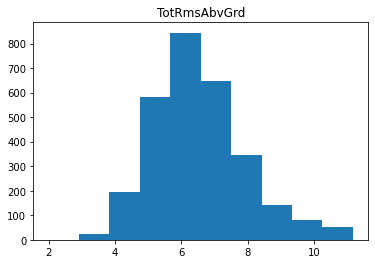

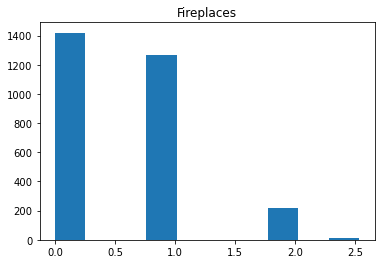

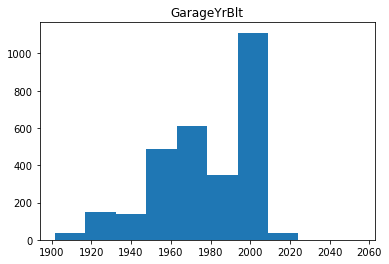

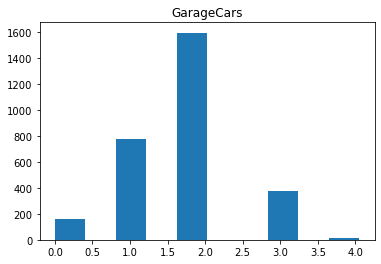

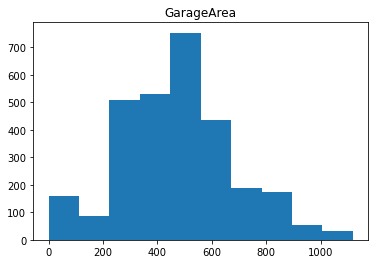

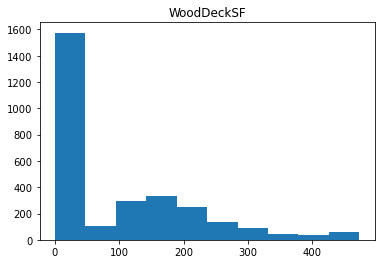

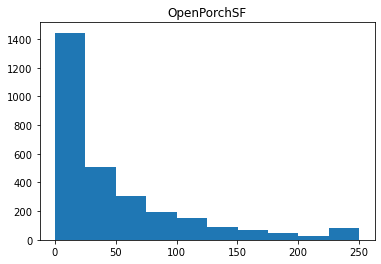

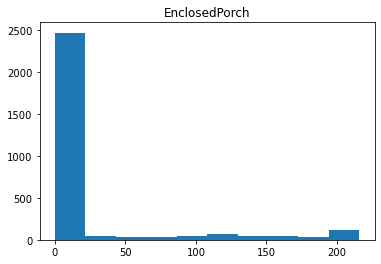

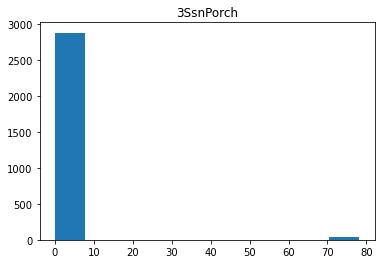

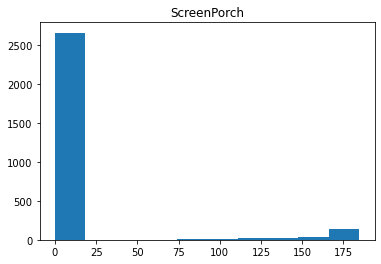

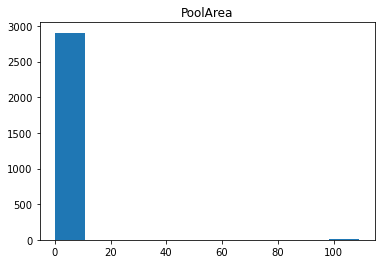

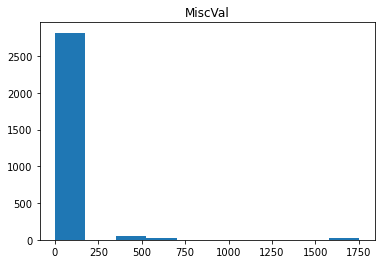

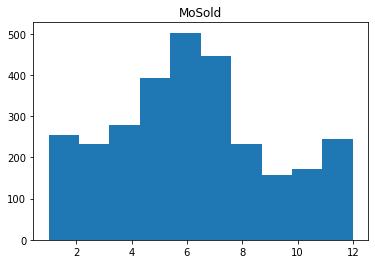

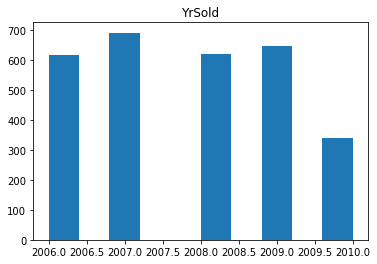

In [23]:
for item in df_numerical.columns:
    plt.hist(df_numerical[item])
    plt.title(item)
    plt.show()

In [24]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.000000,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.000000,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,0.798146,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.000000,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.000000,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.000000,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,215.831058,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.000000,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.000000,0.0,0.0,0.0,0.0,12.0,2008.0


***
# <font color='red'>Temporal Variable</font>

In [25]:
# Handle temporary variables

temp_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for feature in temp_cols:
    df_numerical[feature] = 2020 - df_numerical[feature]

In [26]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,17.0,17.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.000000,2.0,1.0,3.0,1.0,8.0,0.0,17.0,2.0,548.0,0.0,61.0,0.000000,0.0,0.0,0.0,0.0,2.0,12.0
1,20.0,80.0,9600.0,6.0,8.0,44.0,44.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,0.798146,2.0,0.0,3.0,1.0,6.0,1.0,44.0,2.0,460.0,298.0,0.0,0.000000,0.0,0.0,0.0,0.0,5.0,13.0
2,60.0,68.0,11250.0,7.0,5.0,19.0,18.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.000000,2.0,1.0,3.0,1.0,6.0,1.0,19.0,2.0,608.0,0.0,42.0,0.000000,0.0,0.0,0.0,0.0,9.0,12.0
3,70.0,60.0,9550.0,7.0,5.0,105.0,50.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.000000,1.0,0.0,3.0,1.0,7.0,1.0,22.0,3.0,642.0,0.0,35.0,215.831058,0.0,0.0,0.0,0.0,2.0,14.0
4,60.0,84.0,14260.0,8.0,5.0,20.0,20.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.000000,2.0,1.0,4.0,1.0,9.0,1.0,20.0,3.0,836.0,192.0,84.0,0.000000,0.0,0.0,0.0,0.0,12.0,12.0


***
# <font color='red'>Scaling Numerical Variables</font>

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [28]:
cols = df_numerical.columns
s = pd.DataFrame(scalar.fit_transform(df_numerical), columns= cols)
s.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,-0.157646
1,-0.878057,0.519284,-0.060423,-0.064197,2.220200,-0.154661,0.395604,-0.613032,1.234311,-0.320225,-0.631993,0.512282,0.287249,-0.787509,-0.116012,-0.483864,-0.821864,3.959798,0.788896,-0.758912,0.181014,-0.210348,-0.287902,0.634990,0.088268,0.307723,-0.056609,1.733939,-0.758324,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-0.446925,0.602962
2,0.070508,-0.035129,0.294822,0.647137,-0.517338,-0.980625,-0.848965,0.407713,0.109578,-0.320225,-0.288595,-0.305255,-0.633998,1.243293,-0.116012,0.602101,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,-0.287902,0.634990,-0.903911,0.307723,0.639639,-0.774402,-0.066615,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,1.026753,-0.157646
3,0.307649,-0.404739,-0.071188,0.647137,-0.517338,1.860691,0.682812,-0.613032,-0.507654,-0.320225,-0.045928,-0.697290,-0.523556,0.985339,-0.116012,0.459102,1.094276,-0.252538,-1.032796,-0.758912,0.181014,-0.210348,0.360527,0.634990,-0.784850,1.622964,0.799588,-0.774402,-0.181900,3.534482,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,1.363569
4,0.070508,0.704089,0.942874,1.358472,-0.517338,-0.947586,-0.753229,1.592282,0.495919,-0.320225,-0.160394,0.232599,-0.027915,1.681814,-0.116012,1.455952,1.094276,-0.252538,0.788896,1.241828,1.434169,-0.210348,1.657386,0.634990,-0.864224,1.622964,1.712239,0.841710,0.625093,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,2.132012,-0.157646


In [29]:
df_numerical = s
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,-0.157646
1,-0.878057,0.519284,-0.060423,-0.064197,2.220200,-0.154661,0.395604,-0.613032,1.234311,-0.320225,-0.631993,0.512282,0.287249,-0.787509,-0.116012,-0.483864,-0.821864,3.959798,0.788896,-0.758912,0.181014,-0.210348,-0.287902,0.634990,0.088268,0.307723,-0.056609,1.733939,-0.758324,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-0.446925,0.602962
2,0.070508,-0.035129,0.294822,0.647137,-0.517338,-0.980625,-0.848965,0.407713,0.109578,-0.320225,-0.288595,-0.305255,-0.633998,1.243293,-0.116012,0.602101,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,-0.287902,0.634990,-0.903911,0.307723,0.639639,-0.774402,-0.066615,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,1.026753,-0.157646
3,0.307649,-0.404739,-0.071188,0.647137,-0.517338,1.860691,0.682812,-0.613032,-0.507654,-0.320225,-0.045928,-0.697290,-0.523556,0.985339,-0.116012,0.459102,1.094276,-0.252538,-1.032796,-0.758912,0.181014,-0.210348,0.360527,0.634990,-0.784850,1.622964,0.799588,-0.774402,-0.181900,3.534482,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,1.363569
4,0.070508,0.704089,0.942874,1.358472,-0.517338,-0.947586,-0.753229,1.592282,0.495919,-0.320225,-0.160394,0.232599,-0.027915,1.681814,-0.116012,1.455952,1.094276,-0.252538,0.788896,1.241828,1.434169,-0.210348,1.657386,0.634990,-0.864224,1.622964,1.712239,0.841710,0.625093,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,2.132012,-0.157646


***
# <font color='red'>One Hot Encoding</font>

In [30]:
large_features = [feature for feature in df_category.columns if len(df_category[feature].unique()) >= 8]
large_features

['Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Functional',
 'SaleType']

In [31]:
# Encode Categories with more then 7 features

def one_hot_encode(data, column):
    features = data[column].value_counts().head(7).index
    for cat in features:
        data[column + '_' +cat] = np.where(data[column] == cat, 1, 0)
    data.drop(column, axis=1, inplace=True)

In [32]:
for item in large_features:
    one_hot_encode(df_category, item)

In [33]:
df_category.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,RoofStyle,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleCondition,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosA,Condition2_PosN,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,RoofMatl_Metal,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw
0,RL,Pave,Alley_Missing,Reg,Lvl,AllPub,Inside,Gtl,1Fam,Gable,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,FireplaceQu_Missing,Attchd,RFn,TA,TA,Y,PoolQC_Missing,Fence_Missing,MiscFeature_Missing,Normal,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,RL,Pave,Alley_Missing,Reg,Lvl,AllPub,FR2,Gtl,1Fam,Gable,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,TA,Attchd,RFn,TA,TA,Y,PoolQC_Missing,Fence_Missing,MiscFeature_Missing,Normal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,RL,Pave,Alley_Missing,IR1,Lvl,AllPub,Inside,Gtl,1Fam,Gable,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,Y,PoolQC_Missing,Fence_Missing,MiscFeature_Missing,Normal,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,RL,Pave,Alley_Missing,IR1,Lvl,AllPub,Corner,Gtl,1Fam,Gable,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Gd,Detchd,Unf,TA,TA,Y,PoolQC_Missing,Fence_Missing,MiscFeature_Missing,Abnorml,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,RL,Pave,Alley_Missing,IR1,Lvl,AllPub,FR2,Gtl,1Fam,Gable,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,TA,Attchd,RFn,TA,TA,Y,PoolQC_Missing,Fence_Missing,MiscFeature_Missing,Normal,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [34]:
df_category.shape

(2919, 97)

In [35]:
for item in df_category.columns:
    print(f"{item} : {len(df_category[item].unique())}")

MSZoning : 6
Street : 2
Alley : 3
LotShape : 4
LandContour : 4
Utilities : 3
LotConfig : 5
LandSlope : 3
BldgType : 5
RoofStyle : 6
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 5
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
PoolQC : 4
Fence : 5
MiscFeature : 5
SaleCondition : 6
Neighborhood_NAmes : 2
Neighborhood_CollgCr : 2
Neighborhood_OldTown : 2
Neighborhood_Edwards : 2
Neighborhood_Somerst : 2
Neighborhood_NridgHt : 2
Neighborhood_Gilbert : 2
Condition1_Norm : 2
Condition1_Feedr : 2
Condition1_Artery : 2
Condition1_RRAn : 2
Condition1_PosN : 2
Condition1_RRAe : 2
Condition1_PosA : 2
Condition2_Norm : 2
Condition2_Feedr : 2
Condition2_Artery : 2
Condition2_PosA : 2
Condition2_PosN : 2
Condition2_RRNn : 2
Condition2_RRAn : 2
HouseStyle_1Story : 2
HouseStyle_2Story : 2
HouseStyle

In [36]:
s = pd.get_dummies(df_category, drop_first=True)
s.head()

,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosA,Condition2_PosN,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,RoofMatl_Metal,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Utilities_Utilities_Missing,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_KitchenQual_Missing,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_PoolQC_Missing,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0

In [37]:
df_category = s
df_category.head()

,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosA,Condition2_PosN,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,RoofMatl_Metal,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Utilities_Utilities_Missing,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_KitchenQual_Missing,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_PoolQC_Missing,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0

In [38]:
df_category.shape, df_numerical.shape

((2919, 195), (2919, 36))

In [39]:
df_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,-0.157646
1,-0.878057,0.519284,-0.060423,-0.064197,2.220200,-0.154661,0.395604,-0.613032,1.234311,-0.320225,-0.631993,0.512282,0.287249,-0.787509,-0.116012,-0.483864,-0.821864,3.959798,0.788896,-0.758912,0.181014,-0.210348,-0.287902,0.634990,0.088268,0.307723,-0.056609,1.733939,-0.758324,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-0.446925,0.602962
2,0.070508,-0.035129,0.294822,0.647137,-0.517338,-0.980625,-0.848965,0.407713,0.109578,-0.320225,-0.288595,-0.305255,-0.633998,1.243293,-0.116012,0.602101,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,-0.287902,0.634990,-0.903911,0.307723,0.639639,-0.774402,-0.066615,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,1.026753,-0.157646
3,0.307649,-0.404739,-0.071188,0.647137,-0.517338,1.860691,0.682812,-0.613032,-0.507654,-0.320225,-0.045928,-0.697290,-0.523556,0.985339,-0.116012,0.459102,1.094276,-0.252538,-1.032796,-0.758912,0.181014,-0.210348,0.360527,0.634990,-0.784850,1.622964,0.799588,-0.774402,-0.181900,3.534482,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,1.363569
4,0.070508,0.704089,0.942874,1.358472,-0.517338,-0.947586,-0.753229,1.592282,0.495919,-0.320225,-0.160394,0.232599,-0.027915,1.681814,-0.116012,1.455952,1.094276,-0.252538,0.788896,1.241828,1.434169,-0.210348,1.657386,0.634990,-0.864224,1.622964,1.712239,0.841710,0.625093,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,2.132012,-0.157646


#### <font color='green'>Concat Numerical & Categorical dataframe</font>

In [40]:
df_category.reset_index(drop=True, inplace=True)
df_numerical.reset_index(drop=True, inplace=True)
data = pd.concat([df_numerical, df_category], axis=1)

In [41]:
df_category.shape, df_numerical.shape

((2919, 195), (2919, 36))

In [42]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosA,Condition2_PosN,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,RoofMatl_Metal,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Utilities_Utilities_Missing,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_KitchenQual_Missing,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_PoolQC_Missing,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-

In [43]:
data.shape

(2919, 231)

***
# <font color='red'>Feature Selection</font>
We'll use Lasso Regression to select best Features

In [44]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [45]:
train = data.iloc[:1460, :]
test = y

In [46]:
train.shape, test.shape

((1460, 231), (1460,))

In [47]:
Lasso(alpha=1.0, random_state=0)

Lasso(random_state=0)

In [48]:
feature_sel_model = SelectFromModel(Lasso(alpha=1.0, random_state=0)) # remember to set the seed, the
feature_sel_model.fit(train, test)

C:\Users\arunn\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45683016638.43054, tolerance: 920791133.4609975
  model = cd_fast.enet_coordinate_descent(


SelectFromModel(estimator=Lasso(random_state=0))

In [49]:
# All those column required are marked as true & all those not required are marked False

feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [50]:
# Lets print the number of total & selected features

# This is how we can make a list of the selected features
selected_feature = train.columns[(feature_sel_model.get_support())]

# Let's print some stats
print(f"total featue : {train.shape}")
print(f"selected feature : {len(selected_feature)}")
print(f"feature with coefficient shrank to zero : {np.sum(feature_sel_model.estimator_.coef_ == 0)}")

total featue : (1460, 231)
selected feature : 219
feature with coefficient shrank to zero : 11


In [51]:
train[selected_feature].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosA,Condition2_PosN,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,RoofMatl_Metal,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,-0.157646,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,

In [52]:
s = pd.concat([train[selected_feature], test], axis=1)

In [53]:
s.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosA,Condition2_PosN,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,RoofMatl_Metal,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,-0.157646,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [55]:
lin_model = LinearRegression()
cross_val_score(lin_model, train, test, cv=5)

C:\Users\arunn\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\arunn\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\arunn\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_base.py", line 547, in fit
    linalg.lstsq(X, y)
  File "C:\Users\arunn\AppData\Roaming\Python\Python38\site-packages\scipy\linalg\basic.py", line 1223, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"


array([            nan, -1.42925716e+22, -5.19095508e+20, -3.30419807e+22,
       -1.39261768e+23])

In [56]:
train[train.columns[(feature_sel_model.get_support())]].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosA,Condition2_PosN,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,RoofMatl_Metal,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,-0.157646,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,

In [57]:
# Using Cross validation lets calculate which alpha value is best


lin_model = LinearRegression()

accuracy = list()
for i in [5, 10, 13, 15, 17, 18, 19,20, 21,22, 23, 24]:
    feature_sel_model = SelectFromModel(Lasso(alpha=i, random_state=0))
    feature_sel_model.fit(train, test)
    selected_feature = train.columns[(feature_sel_model.get_support())]
    
    x = train[train.columns[(feature_sel_model.get_support())]]
    
    val = cross_val_score(lin_model, x, test, cv=5)
    accuracy.append(val.mean())

In [58]:
# Show accuracy for all the alpha value considered

accuracy

[-2.416130594959402e+23,
 -7.904453516283148e+22,
 -4.214287198581422e+20,
 -6.822950664522446e+20,
 -8.48277375908246e+19,
 -9.18799569001537e+19,
 -2.1519972055966073e+21,
 -4.0729983615977185e+19,
 -3.357422834076203e+19,
 -2.756198626323234e+21,
 -1.3663189572657002e+19,
 -4.337184818705422e+20]

In [59]:
# it shows that for  alpha=23 the accuracy is maximum

max(accuracy)

-1.3663189572657002e+19

In [60]:
feature_sel_model = SelectFromModel(Lasso(alpha=23, random_state=0))
feature_sel_model.fit(train, test)
selected_feature = train.columns[(feature_sel_model.get_support())]
    
x = train[train.columns[(feature_sel_model.get_support())]]

In [61]:
print(f"total featue : {train.shape}")
print(f"selected feature : {len(selected_feature)}")
print(f"feature with coefficient shrank to zero : {np.sum(feature_sel_model.estimator_.coef_ == 0)}")

total featue : (1460, 231)
selected feature : 157
feature with coefficient shrank to zero : 74


In [62]:
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_RRAn,Condition1_RRAe,Condition2_PosN,HouseStyle_1Story,HouseStyle_SLvl,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_Tar&Grv,RoofMatl_WdShngl,RoofMatl_ClyTile,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Maj1,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,RoofStyle_Gable,RoofStyle_Gambrel,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_OthW,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Po,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,-0.157646,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,-0.878057,0.519284,-0.060423,-0.064197,2.220200,-0.154661,0.395604,-0.613032,1.234311,-0.320225,-0.631993,0.512282,0.287249,-0.787509,-0.116012,-0.483864,-0.821864,3.959798,0.788896,-0.758912,0.181014,-0.210348,-0.287902,0.634990,0.088268,0.307723,-0.056609,1.733939,-0.758324,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-0.446925,0.602962,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,0.070508,-0.035129,0.294822,0.647137,-0.517338,-0.980625,-0.848965,0.407713,0.109578,-0.320225,-0.288595,-0.305255,-0.633998,1.243293,-0.116012,0.602101,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,-0.287902,0.634990,-0.903911,0.307723,0.639639,-0.774402,-0.066615,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,1.026753,-0.157646,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1

In [63]:
test

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [64]:
df_final = pd.concat([x, test], axis=1)

In [65]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_RRAn,Condition1_RRAe,Condition2_PosN,HouseStyle_1Story,HouseStyle_SLvl,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_Tar&Grv,RoofMatl_WdShngl,RoofMatl_ClyTile,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Maj1,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,RoofStyle_Gable,RoofStyle_Gambrel,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,Foundation_CBlock,Foundation_PConc,Foundation_Wood,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_OthW,HeatingQC_Gd,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Po,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SalePrice
0,0.070508,-0.173733,-0.308018,0.647137,-0.517338,-1.046702,-0.896833,0.621944,0.612508,-0.320225,-0.938762,-0.458244,-0.806395,1.215152,-0.116012,0.444595,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,1.008957,-0.932384,-0.983286,0.307723,0.357376,-0.774402,0.246300,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-1.552184,-0.157646,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,208500
1,-0.878057,0.519284,-0.060423,-0.064197,2.220200,-0.154661,0.395604,-0.613032,1.234311,-0.320225,-0.631993,0.512282,0.287249,-0.787509,-0.116012,-0.483864,-0.821864,3.959798,0.788896,-0.758912,0.181014,-0.210348,-0.287902,0.634990,0.088268,0.307723,-0.056609,1.733939,-0.758324,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,-0.446925,0.602962,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,181500
2,0.070508,-0.035129,0.294822,0.647137,-0.517338,-0.980625,-0.848965,0.407713,0.109578,-0.320225,-0.288595,-0.305255,-0.633998,1.243293,-0.116012,0.602101,1.094276,-0.252538,0.788896,1.241828,0.181014,-0.210348,-0.287902,0.634990,-0.903911,0.307723,0.639639,-0.774402,-0.066615,-0.387685,-0.112533,-0.302895,-0.066884,-0.160183,1.026753,-0.157646,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0

In [66]:
df_final.shape

(1460, 158)

In [67]:
df_final.to_csv('train.csv')

In [68]:
df.shape

(2919, 79)

#### Now Put the test data to csv

In [69]:
s = data.iloc[1460:, :]

In [70]:
s.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_NridgHt,Neighborhood_Gilbert,Condition1_Norm,Condition1_Feedr,Condition1_Artery,Condition1_RRAn,Condition1_PosN,Condition1_RRAe,Condition1_PosA,Condition2_Norm,Condition2_Feedr,Condition2_Artery,Condition2_PosA,Condition2_PosN,Condition2_RRNn,Condition2_RRAn,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_1.5Fin,HouseStyle_SLvl,HouseStyle_SFoyer,HouseStyle_2.5Unf,HouseStyle_1.5Unf,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_Membran,RoofMatl_ClyTile,RoofMatl_Metal,Exterior1st_VinylSd,Exterior1st_MetalSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior2nd_VinylSd,Exterior2nd_MetalSd,Exterior2nd_HdBoard,Exterior2nd_Wd Sdng,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Functional_Typ,Functional_Min2,Functional_Min1,Functional_Mod,Functional_Maj1,Functional_Maj2,Functional_Sev,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_CWD,SaleType_ConLI,SaleType_ConLw,MSZoning_FV,MSZoning_MSZoning_Missing,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Utilities_Utilities_Missing,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_MasVnrType_Missing,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_BsmtExposure_Missing,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_BsmtFinType1_Missing,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_BsmtFinType2_Missing,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_KitchenQual_Missing,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_FireplaceQu_Missing,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_GarageType_Missing,GarageFinish_GarageFinish_Missing,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_GarageQual_Missing,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_GarageCond_Missing,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_PoolQC_Missing,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,-0.878057,0.519284,0.374913,-0.775532,0.395175,0.340918,1.113625,-0.613032,0.068429,0.800709,-0.664044,-0.396092,-0.698647,-0.787509,-0.116012,-1.242382,-0.821864,-0.252538,-1.032796,-0.758912,-1.072141,-0.210348,-0.936332,-0.932384,0.683575,-1.007519,1.213574,0.404013,-0.758324,-0.387685,-0.112533,2.32

In [71]:
s.shape

(1459, 231)

In [72]:
s = s[s.columns[(feature_sel_model.get_support())]]

In [73]:
s.shape

(1459, 157)